<a href="https://colab.research.google.com/github/stevengregori92/SVM-Intro/blob/main/Customer_Spending_with_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value

#Import Dataset

In [3]:
!gdown https://drive.google.com/uc?id=1Bc2MKZsSkpVuHyQlehmBUBNV9g3Rq7s0

Downloading...
From: https://drive.google.com/uc?id=1Bc2MKZsSkpVuHyQlehmBUBNV9g3Rq7s0
To: /content/cust.zip
100% 23.9k/23.9k [00:00<00:00, 55.3MB/s]


In [4]:
!unzip /content/cust.zip

Archive:  /content/cust.zip
replace customer_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
df = pd.read_csv('customer_data.csv')
df

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


#Cleaning Dataset

,missing_value,%
name,0,0.0
age,0,0.0
gender,0,0.0
education,0,0.0
income,0,0.0
country,0,0.0
purchase_frequency,0,0.0
spending,0,0.0


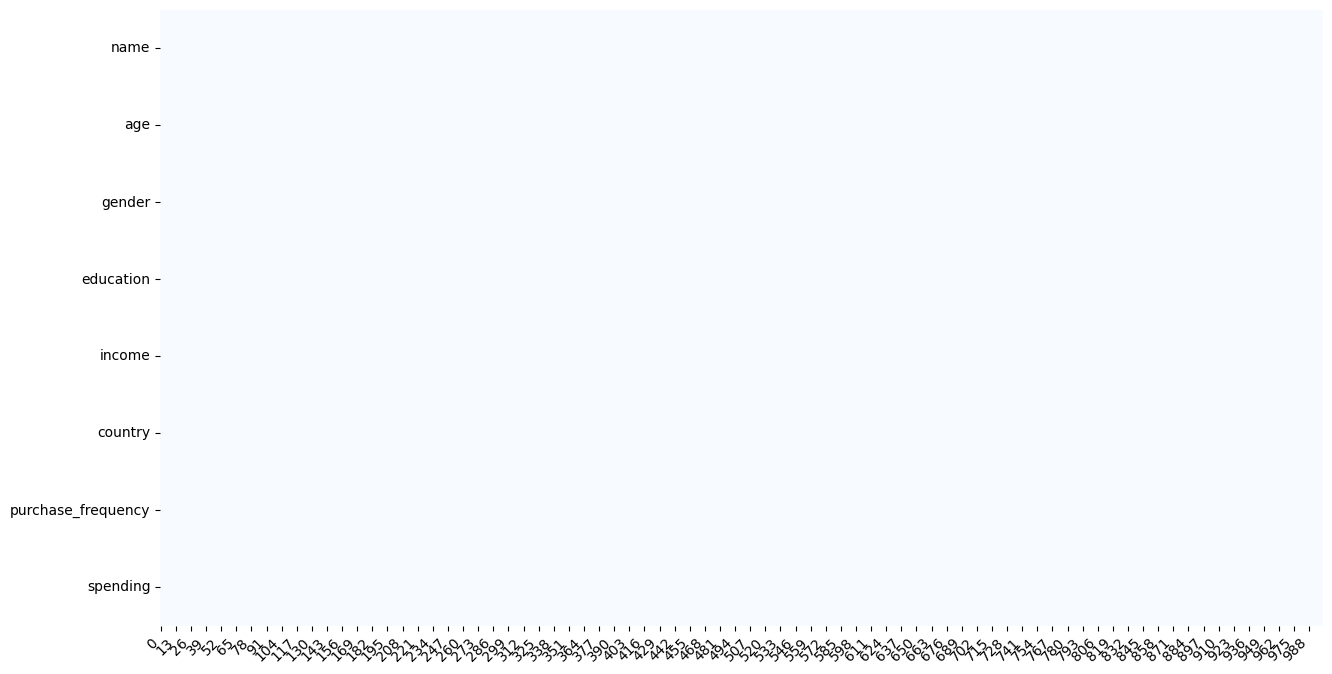

In [6]:
plot_missing_value(df, return_df=True)

In [7]:
df.drop(columns=['name'], inplace=True)

#Dataset Splitting

In [8]:
X = df.drop(columns=['spending'])
y = df.spending

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 6), (200, 6), (800,), (200,))

#Dataset Training

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [10]:
X_train.columns

Index(['age', 'gender', 'education', 'income', 'country',
       'purchase_frequency'],
      dtype='object')

In [11]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling = 'robust'), ['age', 'income', 'purchase_frequency']),
    ('categoric', cat_pipe(encoder='onehot'), ['gender', 'education', 'country'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 1000.0, 'algo__gamma': 0.1}
0.9853165649131896 0.9718559089451434 0.980327331641354


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#Feature Importance

In [12]:
from jcopml.feature_importance import mean_score_decrease

,feature,importance,stdev
5,purchase_frequency,1.608493,0.062358
2,education,0.160948,0.004423
0,age,0.104437,0.004562
3,income,0.029011,0.002281
1,gender,0.027033,0.000689
4,country,0.004538,0.000132


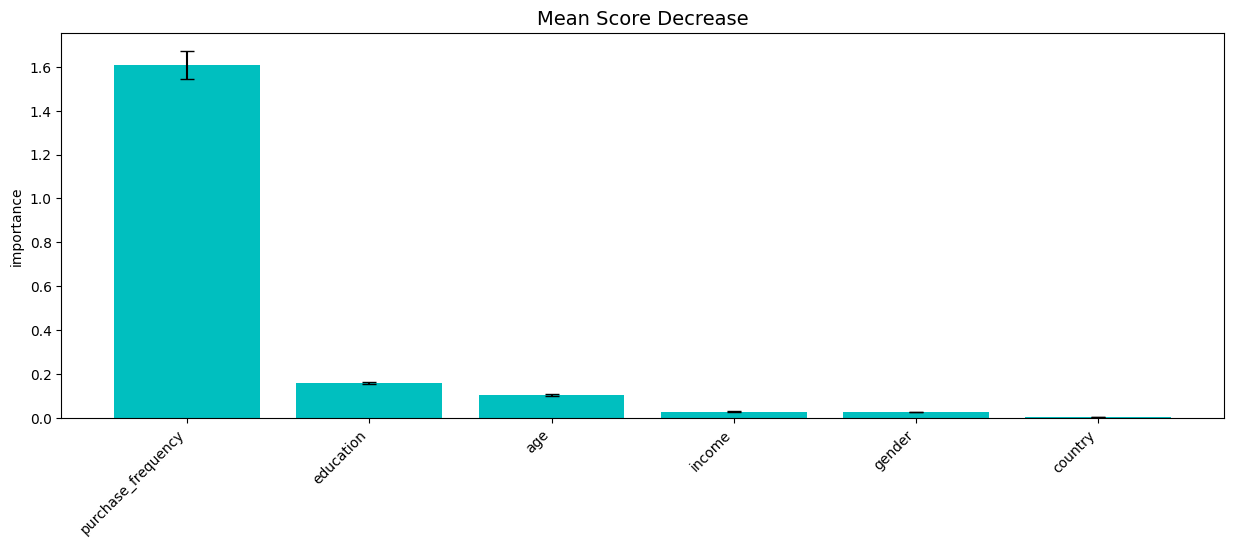

In [13]:
mean_score_decrease(X_train, y_train, model, plot=True)

In [14]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling = 'robust'), ['age', 'income', 'purchase_frequency']),
    ('categoric', cat_pipe(encoder='onehot'), ['education', 'gender'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 1000.0, 'algo__gamma': 0.1}
0.9861910044894253 0.9762258381049479 0.9849124229821893


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#Predict

In [15]:
X.iloc[0:1]

,age,gender,education,income,country,purchase_frequency
0,42,Female,High School,53936,Slovenia,0.9


In [16]:
data=[[21, 'Male', 'Bachelor', 10000, 'USA', 0.5], [34, 'Female', 'Bachelor', 150000, 'Indonesia', 0.3]]

X_pred = pd.DataFrame(data, columns=X.columns)
X_pred

,age,gender,education,income,country,purchase_frequency
0,21,Male,Bachelor,10000,USA,0.5
1,34,Female,Bachelor,150000,Indonesia,0.3


In [17]:
model.predict(X_pred)

array([5245.48498159, 6571.11009935])

#Save Model

In [18]:
from jcopml.utils import save_model

In [19]:
save_model(model, 'svm_cust_spend.pkl')

Model is pickled as model/svm_cust_spend.pkl


In [20]:
save_model(model.best_estimator_, 'svm_cust_spend_small.pkl')

Model is pickled as model/svm_cust_spend_small.pkl


#Load Model

In [21]:
from jcopml.utils import load_model

In [22]:
model_yang_diload = load_model('model/svm_cust_spend_small.pkl')
model_yang_diload

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'income',
                                                   'purchase_frequency']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education', 'gender'])])),
                ('algo', SVR(C=1000.0, gamma=0.1, max_iter=500))])